In [131]:
#import relevant packages

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [87]:
microplastic = gpd.read_file('Marine Microplastic Concentrations.geojson') #import geojson file containing microplastic survey data
MPAs = gpd.read_file('c20230705-OffshoreMPAs-WGS84/c20230705_OffshoreMPAs_WGS84.shp') #import shape file of marine protected area (MPAs)

In [88]:
microplastic.head()

,OBJECTID,OCEANS,REGIONS,SUBREGIONS,COUNTRY,STATE,BEACH,SETTING,OBDEPTHM,SSDEPTHM,...,ACCESSLINK,SYMBOLOGY,Latitude,Longitude,Date,Mesh,StandNurdAmt,WaSDepthM,GlobalID,geometry
0,14299,Atlantic Ocean,North Sea,,,,,Ocean water,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",56.3137,-2.5485,30/11/2019,0.3350,,0.100000,,POINT (-2.5485 56.31367)
1,14035,Atlantic Ocean,North Sea,,,,,Ocean water,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Medium, 0.005-1 pieces/m3",56.2070,-2.4288,01/12/2014,0.3350,,0.100000,,POINT (-2.42883 56.207)
2,14342,Atlantic Ocean,North Sea,,,,,Ocean water,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Medium, 0.005-1 pieces/m3",56.2183,-2.4455,05/01/2021,0.3350,,0.100000,,POINT (-2.4455 56.21833)
3,14328,Atlantic Ocean,North Sea,,,,,Ocean water,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Medium, 0.005-1 pieces/m3",56.2882,-2.5017,18/01/2020,0.3350,,0.100000,,POINT (-2.50167 56.28817)
4,14135,Atlantic Ocean,North Sea,,,,,Ocean water,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Medium, 0.005-1 pieces/m3",56.3038,-2.5265,05/01/2018,0.3350,,0.100000,,POINT (-2.5265 56.30383)


In [89]:
MPAs.head()

,SITE_CODE,SITE_NAME,SITE_STATU,Country,CP2_REGION,LONG_dd,LAT_dd,Agency,PreDesCode,WDPA_CODE,NonMarFeat,EST_DATE,AREA_HA,geometry
0,UKNCMPA020,Central Fladen,NCMPA,Scotland offshore,Northern North Sea,-0.240188,59.042500,JNCC,CFL,555560480,No,23-07-2014,92500.0,"POLYGON ((0.10898 58.85518, -0.00284 58.81905,..."
1,UKNCMPA029,Turbot Bank,NCMPA,Scotland offshore,Northern North Sea,-0.882555,57.390000,JNCC,TBB,555560489,No,23-07-2014,25100.0,"POLYGON ((-1.05834 57.32466, -1.07548 57.3456,..."
2,UKNCMPA030,West Shetland Shelf,NCMPA,Scotland offshore,Scottish Continental Shelf,-4.918147,59.541389,JNCC,WSS,555560490,No,23-07-2014,408300.0,"POLYGON ((-3.99968 59.50027, -5.51991 59.26975..."
3,UKNCMPA024,Hatton-Rockall Basin,NCMPA,Scotland offshore,Atlantic North-West Approaches,-16.401607,58.059167,JNCC,HRB,555560484,No,23-07-2014,125600.0,"POLYGON ((-16.648 57.85, -16.648 58.25, -16.15..."
4,UKNCMPA019,North-west Orkney,NCMPA,Scotland inshore & Scotland offshore,Scottish Continental Shelf,-3.148898,59.515000,JNCC,NWO,555560479,No,23-07-2014,436500.0,"POLYGON ((-4.03969 59.16154, -3.86622 59.349, ..."


In [90]:
microplastic = microplastic.to_crs(epsg=3857) #convert to same coordinate reference system - epsg is one common used by contextily's base map

In [91]:
MPAs = MPAs.to_crs(epsg = 3857) #convert to same coordinate reference system - epsg is one common used by contextily's base map

In [92]:
microplastic.columns

Index(['OBJECTID', 'OCEANS', 'REGIONS', 'SUBREGIONS', 'COUNTRY', 'STATE',
       'BEACH', 'SETTING', 'OBDEPTHM', 'SSDEPTHM', 'SAMPMETHOD', 'TRANSECT',
       'SAMPPTBEACH', 'VOLNUM', 'COLLTIME', 'MEASUREMEN', 'UNIT', 'DENSRANGE',
       'DENSTEXT', 'SHORTREF', 'LONGREF', 'DOI', 'ORG', 'KEYWORDS', 'ACCESSNO',
       'ACCESSLINK', 'SYMBOLOGY', 'Latitude', 'Longitude', 'Date', 'Mesh',
       'StandNurdAmt', 'WaSDepthM', 'GlobalID', 'geometry'],
      dtype='object')

In [93]:
MPAs.columns

Index(['SITE_CODE', 'SITE_NAME', 'SITE_STATU', 'Country', 'CP2_REGION',
       'LONG_dd', 'LAT_dd', 'Agency', 'PreDesCode', 'WDPA_CODE', 'NonMarFeat',
       'EST_DATE', 'AREA_HA', 'geometry'],
      dtype='object')

In [94]:
microplastic['MEASUREMEN'] = pd.to_numeric(microplastic['MEASUREMEN'], errors='coerce') #ensure microplastic measurements are numeric

(array([674.,  36.,  12.,   7.,   1.,   2.,   1.,   1.,   0.,   2.]),
 array([  0.       ,  33.3333333,  66.6666666,  99.9999999, 133.3333332,
        166.6666665, 199.9999998, 233.3333331, 266.6666664, 299.9999997,
        333.333333 ]),
 <BarContainer object of 10 artists>)

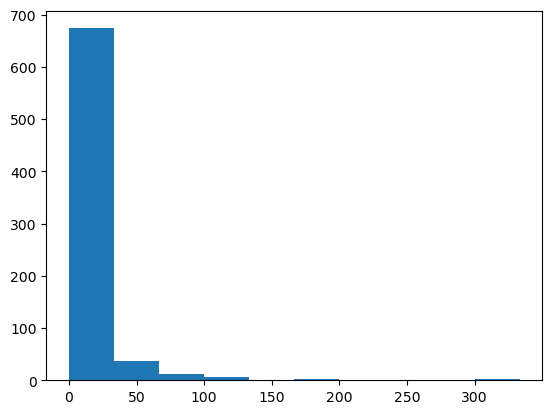

In [95]:
plt.hist(microplastic['MEASUREMEN']) #display histogram of microplastic concentrations

In [96]:
microplastic['MEASUREMEN'].describe() #mean concentration is 8.23, but heavy positive skew

count    736.000000
mean       8.239066
std       29.503347
min        0.000000
25%        0.000000
50%        0.019636
75%        0.124044
max      333.333333
Name: MEASUREMEN, dtype: float64

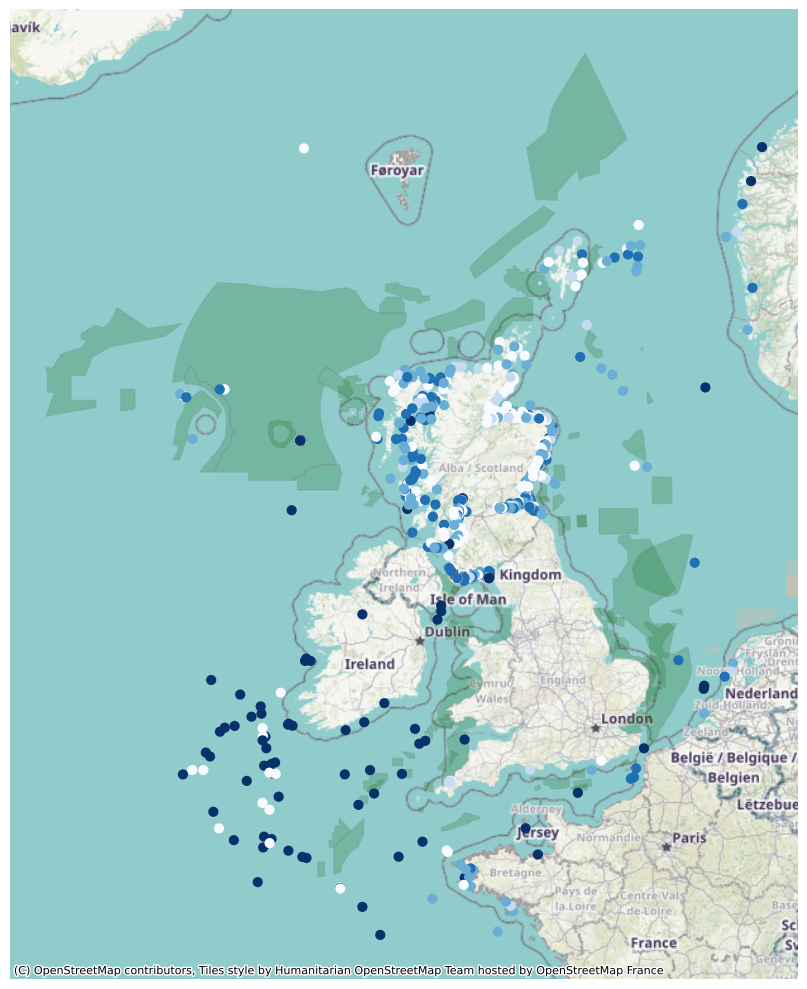

In [163]:
# Plot your data
fig, ax = plt.subplots(figsize=(10, 10))
MPAs.plot(ax = ax, color = 'DarkGreen', alpha = .2, edgecolor = 'Grey')
microplastic.plot(figsize=(10, 10), markersize = 40, column = 'MEASUREMEN', cmap = 'Blues', scheme="Quantiles", k =5, ax = ax) #splits range of microplastic concentration into 5 bins of equal ns.

# Add base map
ax.set_axis_off()

# Adjust the layout to make room for the legend
plt.tight_layout()
ctx.add_basemap(ax)

In [98]:
MPAs['area'] = MPAs.geometry.area

# Group by 'SITE_NAME' and sum the areas
MPAs.groupby('SITE_NAME')['area'].sum().sort_values() #these are in square meters

SITE_NAME
Scanner Pockmark                     2.433626e+07
Pisces Reef Complex                  2.541647e+07
Braemar Pockmarks                    4.293618e+07
Bassurelle Sandbank                  1.663351e+08
Orford Inshore                       1.903012e+08
                                         ...     
Dogger Bank                          3.714788e+10
Hatton Bank                          5.845037e+10
Southern North Sea                   1.045883e+11
North-east Faroe-Shetland Channel    1.115574e+11
West of Scotland                     3.959972e+11
Name: area, Length: 77, dtype: float64

In [99]:
in_MPAs = gpd.sjoin(microplastic, MPAs , how='inner', predicate='within')

In [100]:
in_MPAs['MPA_inout'] = 'Inside MPA'

In [101]:
in_MPAs.describe()['MEASUREMEN'] #178 measurements in MPAs

count    178.000000
mean      27.151396
std       54.026498
min        0.000000
25%        0.000000
50%        0.047828
75%       40.067432
max      333.333333
Name: MEASUREMEN, dtype: float64

(array([127.,  27.,  10.,   7.,   1.,   2.,   1.,   1.,   0.,   2.]),
 array([  0.       ,  33.3333333,  66.6666666,  99.9999999, 133.3333332,
        166.6666665, 199.9999998, 233.3333331, 266.6666664, 299.9999997,
        333.333333 ]),
 <BarContainer object of 10 artists>)

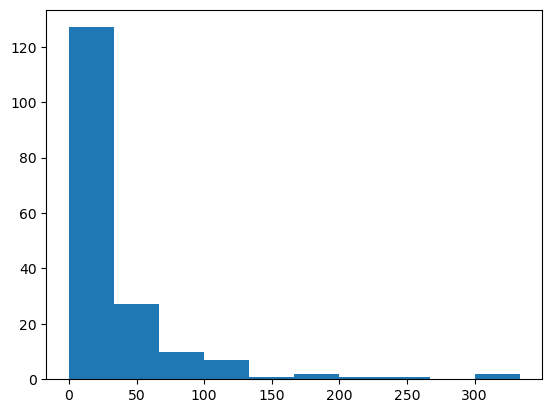

In [102]:
plt.hist(in_MPAs['MEASUREMEN']) 

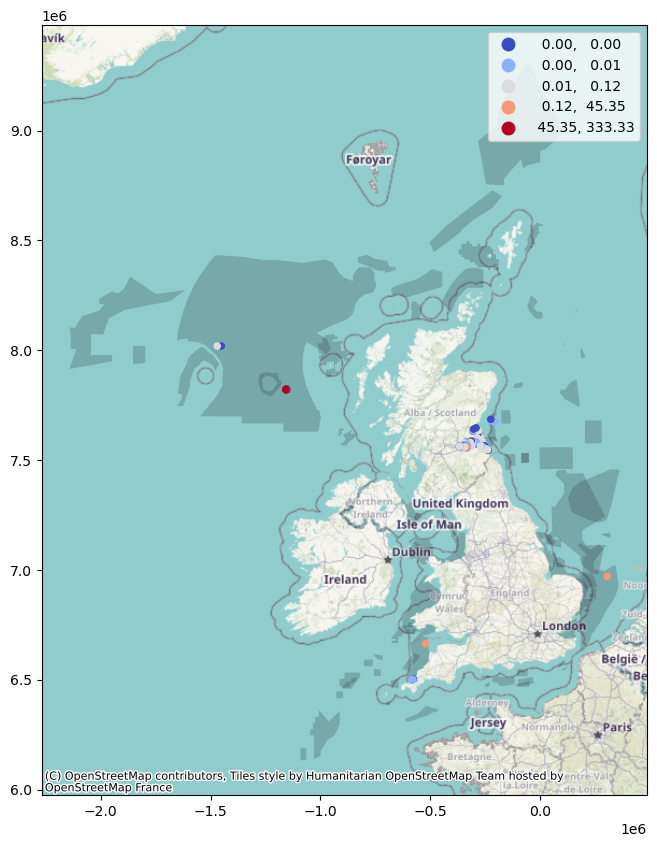

In [145]:
fig, ax = plt.subplots(figsize = (10,10))
MPAs.plot(ax = ax, color = '#1a1d26', alpha = .2)
in_MPAs.plot(figsize=(10, 10), markersize = 20, column = 'MEASUREMEN', cmap = 'coolwarm', scheme="Quantiles", k =5, legend = True, ax = ax)
ctx.add_basemap(ax = ax)

#vast majority of these are in one location (the firth of forth)

In [104]:
 #Get the indices of microplastics that are within MPAs
in_MPAs_index = in_MPAs.index

# Filter microplastics to exclude those that are within MPAs
outside_MPAs = microplastic.loc[~microplastic.index.isin(in_MPAs_index)]

In [105]:
outside_MPAs.head()

,OBJECTID,OCEANS,REGIONS,SUBREGIONS,COUNTRY,STATE,BEACH,SETTING,OBDEPTHM,SSDEPTHM,...,ACCESSLINK,SYMBOLOGY,Latitude,Longitude,Date,Mesh,StandNurdAmt,WaSDepthM,GlobalID,geometry
29,18748,Atlantic Ocean,North Sea,,,,,Beach-Nurdle Patrol,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Nurdle Patrol, Medium, 2-40 pieces/10 mins",56.3388,-2.7829,09/11/2020,,3,,,POINT (-309791.011 7626158.925)
48,14321,Atlantic Ocean,North Sea,,,,,Ocean water,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",55.8888,-2.0480,18/01/2020,0.3350,,0.100000,,POINT (-227982.317 7536317.205)
50,14378,Atlantic Ocean,North Sea,,,,,Ocean water,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Medium, 0.005-1 pieces/m3",55.9477,-2.0403,06/01/2022,0.3350,,0.100000,,POINT (-227128.831 7548004.682)
70,14456,Atlantic Ocean,North Sea,,,,,Ocean water,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",56.0312,-3.5603,21/11/2020,0.3350,,0.100000,,POINT (-396334.457 7564622.628)
71,14341,Atlantic Ocean,North Sea,,,,,Ocean water,,,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",56.0312,-3.5603,21/11/2020,0.3350,,0.100000,,POINT (-396334.457 7564622.628)


In [106]:
outside_MPAs['MPA_inout'] = 'Outside MPA'

/Users/chrisbutler/anaconda3/envs/mcsuk/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [107]:
outside_MPAs.describe()['MEASUREMEN'] #558 measurements in MPAs

count    558.000000
mean       2.206100
std        8.385305
min        0.000000
25%        0.000000
50%        0.016908
75%        0.089073
max       84.000000
Name: MEASUREMEN, dtype: float64

(array([514.,  17.,   9.,   7.,   6.,   2.,   1.,   0.,   0.,   2.]),
 array([ 0. ,  8.4, 16.8, 25.2, 33.6, 42. , 50.4, 58.8, 67.2, 75.6, 84. ]),
 <BarContainer object of 10 artists>)

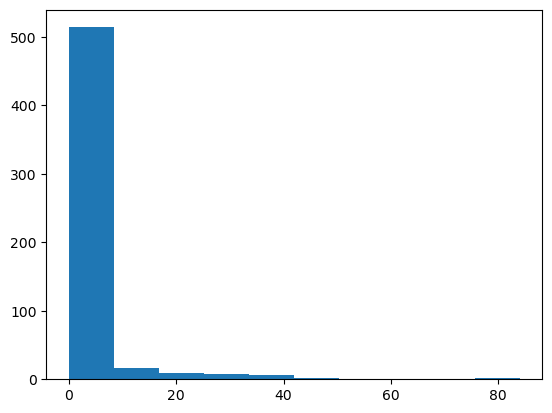

In [108]:
plt.hist(outside_MPAs['MEASUREMEN']) 

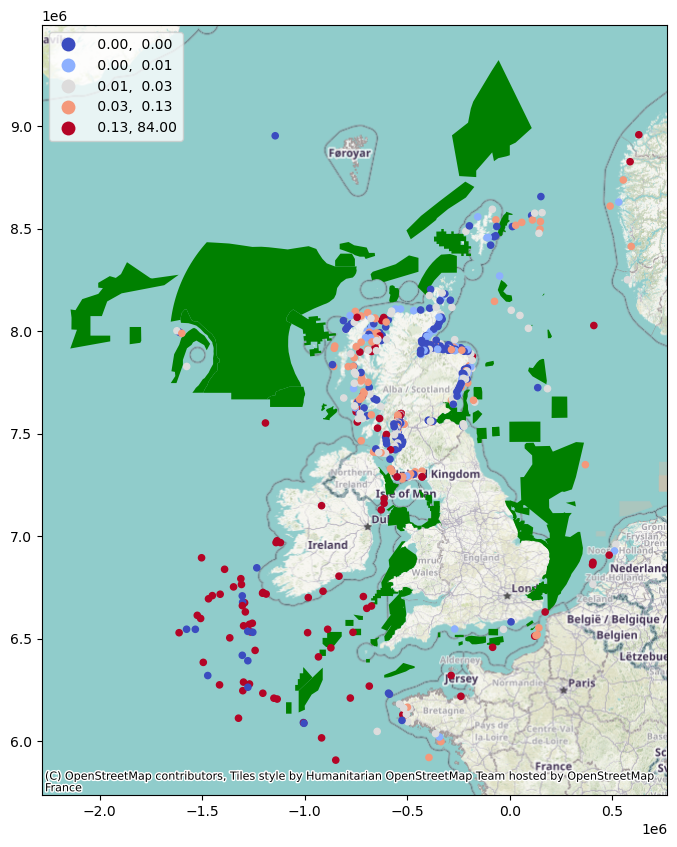

In [143]:
fig, ax = plt.subplots(figsize = (10,10))
MPAs.plot(ax = ax, color = 'green')
outside_MPAs.plot(figsize=(10, 10), markersize = 20, column = 'MEASUREMEN', cmap = 'coolwarm', scheme="Quantiles", k =5, legend = True, ax = ax)
ctx.add_basemap(ax = ax)

In [110]:
#plotting

In [111]:
plot = pd.concat([in_MPAs, outside_MPAs])

In [127]:
barplot = plot.groupby('MPA_inout')['MEASUREMEN'].agg(['median', 'std', 'count', 'mean']).reset_index()

In [128]:
barplot['se'] = barplot['std'] / np.sqrt(barplot['count'])

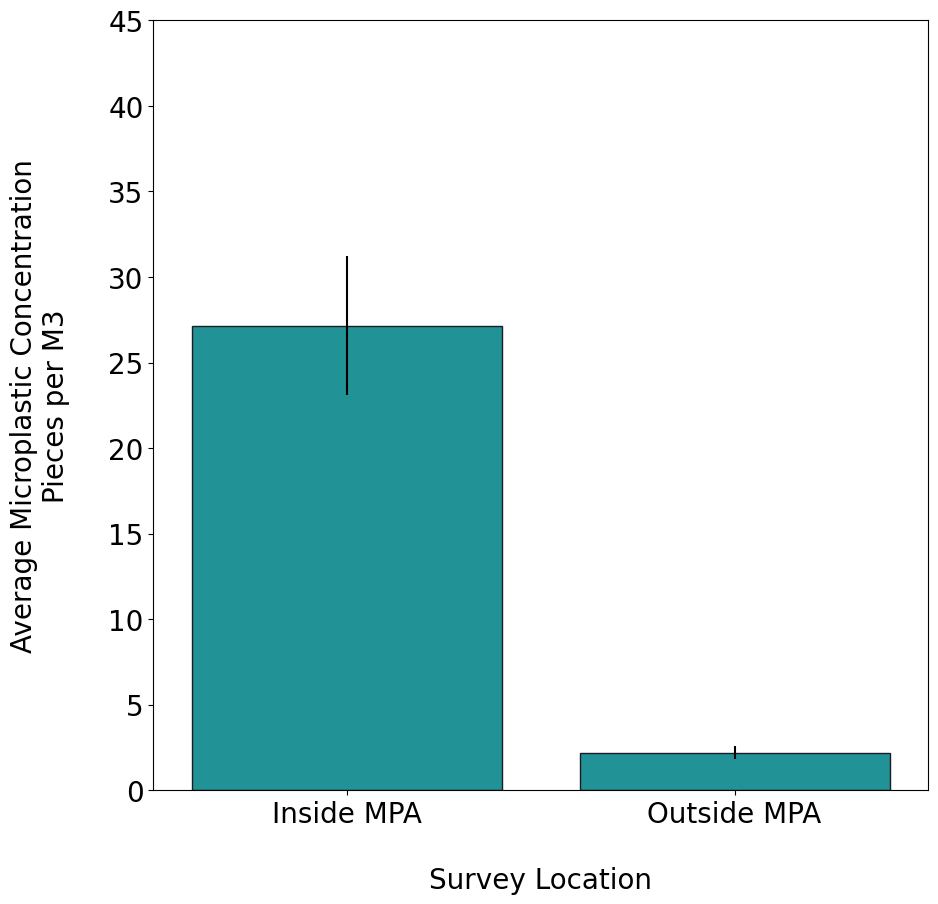

In [173]:
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = 'MPA_inout', y = 'mean', yerr = barplot['se'], data = barplot, color = '#0da6ab', edgecolor = '#1a1d26')
ax.set_xlabel('\nSurvey Location', fontsize = 20)
ax.set_ylabel('Average Microplastic Concentration\n Pieces per M3 \n', fontsize = 20)
ax.set_ylim(0,45)
ax.tick_params(axis='both', which='major', labelsize=20)



In [167]:
barplot

,MPA_inout,median,std,count,mean,se
0,Inside MPA,0.047828,54.026498,178,27.151396,4.049457
1,Outside MPA,0.016908,8.385305,558,2.206100,0.354978


In [139]:
stats.mannwhitneyu(in_MPAs['MEASUREMEN'], outside_MPAs['MEASUREMEN'].dropna()) #P is less than 0.05

MannwhitneyuResult(statistic=np.float64(60021.5), pvalue=np.float64(2.063062450479216e-05))